In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd 
import numpy as np

Importing CSV Files

In [ ]:
Finance_df = pd.read_csv(r"D:\(DATA) Data Analysis\Global finance data.csv")
print(Finance_df.head(3))

         Country        Date         Stock_Index  Index_Value  \
0  United States  15-08-2024             S&P_500       5437.2   
1          China  15-08-2024  Shanghai_Composite       2891.6   
2          Japan  15-08-2024          Nikkei_225      36789.1   

   Daily_Change_Percent  Market_Cap_Trillion_USD  GDP_Growth_Rate_Percent  \
0                  0.34                     51.2                      2.8   
1                 -0.82                     12.4                      5.2   
2                  1.24                      6.8                      0.9   

   Inflation_Rate_Percent  Interest_Rate_Percent  Unemployment_Rate_Percent  \
0                     2.9                    5.5                        3.7   
1                     0.8                    3.1                        5.2   
2                     2.8                   -0.1                        2.4   

   ... Commodity_Index  Oil_Price_USD_Barrel  Gold_Price_USD_Ounce  \
0  ...            1.12                 77.8

Trend Analysis:


Which countries show the highest volatility in Index_Value?


In [ ]:
Highest_Volatile = Finance_df.groupby('Country')['Index_Value'].max().sort_values(ascending=False)
print(Highest_Volatile)

Country
Argentina         1567890.2
Brazil             129834.2
Nigeria             98765.4
India               80456.7
South Africa        75234.6
Mexico              55234.6
Japan               36789.1
Italy               33456.7
Egypt               25678.9
Peru                23456.7
Taiwan              22567.8
Canada              22567.8
Germany             18234.5
Hong Kong           17234.5
Saudi Arabia        12345.6
Switzerland         12234.5
Spain               11123.8
Turkey              10567.8
UAE                  9876.5
United Kingdom       8156.3
Australia            7923.4
France               7389.2
Indonesia            7234.5
Philippines          6789.1
Chile                5678.9
United States        5437.2
Singapore            3456.7
China                2891.6
Russia               2789.1
South Korea          2634.5
Sweden               2567.8
Denmark              2234.5
Israel               1987.3
Malaysia             1634.5
Thailand             1567.8
Norway      

Market Size Comparison:            
Which countries have the largest Market_Cap_Trillion_USD, and how does it relate to their GDP_Growth_Rate_Percent?


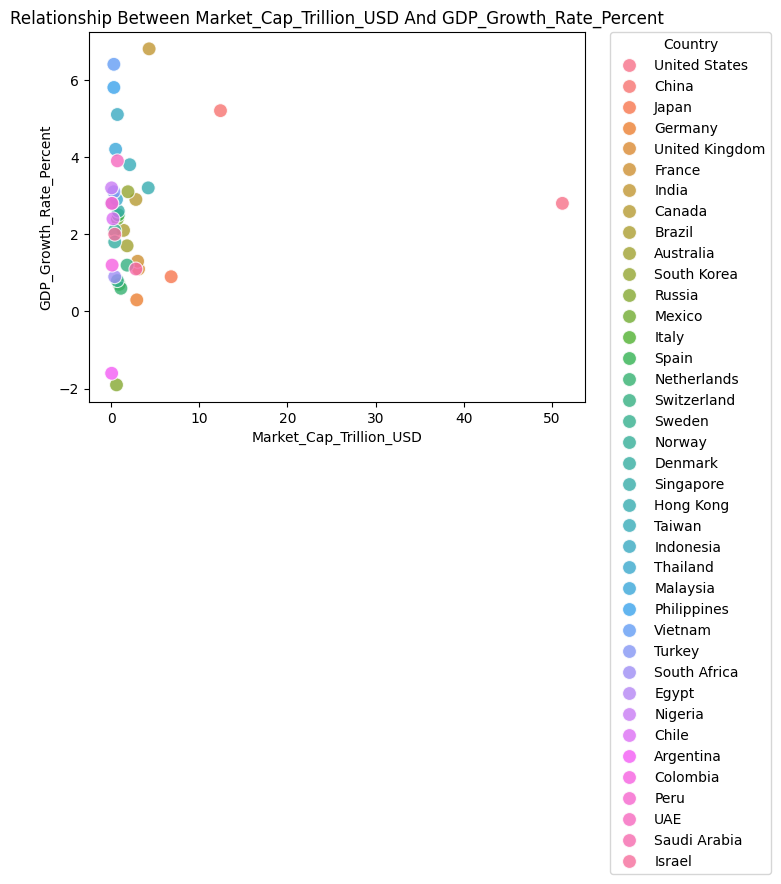

In [ ]:
plt.Figure(figsize=(10,7), constrained_layout=True)
sns.scatterplot(
    x='Market_Cap_Trillion_USD',
    y='GDP_Growth_Rate_Percent',
    data=Finance_df,
    hue='Country',
    s=100,
    alpha=0.8
)
plt.title('Relationship Between Market_Cap_Trillion_USD And GDP_Growth_Rate_Percent')
plt.legend(
    title='Country',
    bbox_to_anchor=(1.05, 1),   # (x, y) position of legend box
    loc='upper left',           # anchor position relative to bbox
    borderaxespad=0.
)
plt.savefig('Relationship Between Market_Cap_Trillion_USD And GDP_Growth_Rate_Percent.png', dpi=300, bbox_inches='tight')
plt.show()

Currency & Market Relationship:


Is there a correlation between Currency_Change_YTD_Percent and Stock_Index performance?


In [ ]:
Corr_col = Finance_df[['Currency_Change_YTD_Percent', 'Index_Value']]

Currany_Change_Corr_Index_Vlaue = Corr_col['Currency_Change_YTD_Percent'].corr(Corr_col['Index_Value'])
print("Correlation between Currency_Change_YTD_Percent and Index_Value:",Currany_Change_Corr_Index_Vlaue)


Correlation between Currency_Change_YTD_Percent and Index_Value: -0.6984325697954362


How does currency strength (Exchange_Rate_USD) affect Import_Growth_Percent and Export_Growth_Percent?


                       Exchange_Rate_USD  Import_Growth_Percent  \
Exchange_Rate_USD               1.000000               0.157003   
Import_Growth_Percent           0.157003               1.000000   
Export_Growth_Percent           0.162210               0.658904   

                       Export_Growth_Percent  
Exchange_Rate_USD                   0.162210  
Import_Growth_Percent               0.658904  
Export_Growth_Percent               1.000000  


TypeError: 'bool' object is not callable

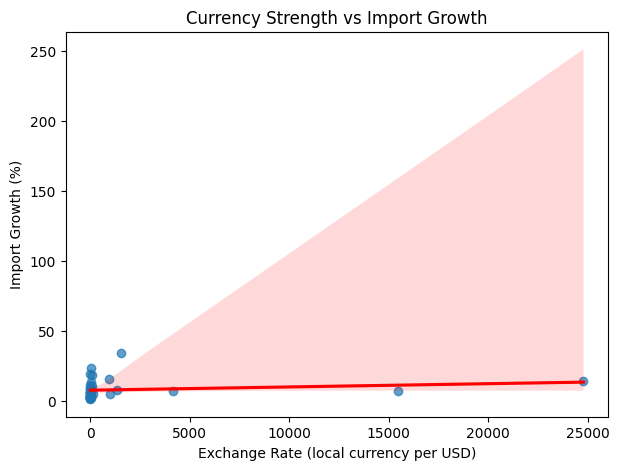

In [ ]:
corr_matrix = Finance_df[['Exchange_Rate_USD', 'Import_Growth_Percent', 'Export_Growth_Percent']].corr()
corr_matrix.to_excel('Correlation Between Exchange Rate USD, Import Growth Percent And Export Growth Percent.xlsx')
print(corr_matrix)

plt.figure(figsize=(7,5))
sns.regplot(
    x='Exchange_Rate_USD',
    y='Import_Growth_Percent',
    data=Finance_df,
    scatter_kws={'alpha':0.7},
    line_kws={'color':'red'}
)
plt.title('Currency Strength vs Import Growth')
plt.xlabel('Exchange Rate (local currency per USD)')
plt.ylabel('Import Growth (%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Currency Strength vs Import Growth.png')
plt.show()

plt.figure(figsize=(7,5))
sns.regplot(
    x='Exchange_Rate_USD',
    y='Export_Growth_Percent',
    data=Finance_df,
    scatter_kws={'alpha':0.7},
    line_kws={'color':'green'}
)
plt.title('Currency Strength vs Export Growth')
plt.xlabel('Exchange Rate (local currency per USD)')
plt.ylabel('Export Growth (%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Currency Strength vs Export Growth.png')
plt.show()



GDP vs Inflation:



What is the relationship between GDP_Growth_Rate_Percent and Inflation_Rate_Percent across countries?


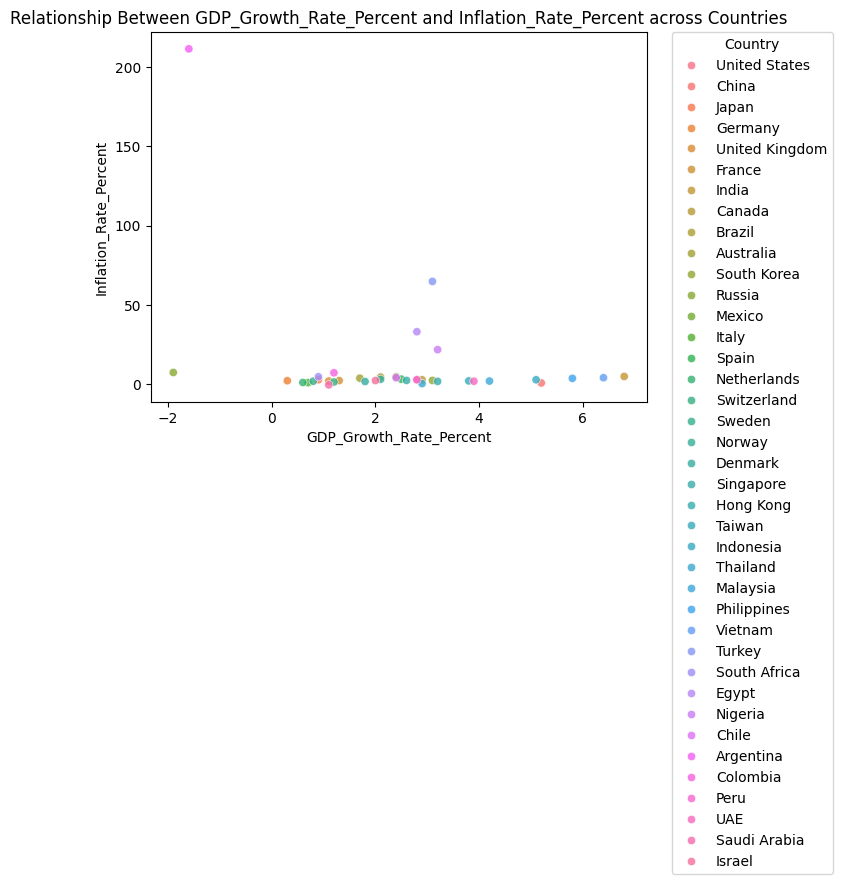

In [ ]:
sns.scatterplot(
    x='GDP_Growth_Rate_Percent',
    y='Inflation_Rate_Percent',
    hue='Country',
    data=Finance_df,
    alpha=0.8
)
plt.title('Relationship Between GDP_Growth_Rate_Percent and Inflation_Rate_Percent across Countries')
plt.grid=True
plt.legend(
    title='Country',
    bbox_to_anchor=(1.05, 1),   # (x, y) position of legend box
    loc='upper left',           # anchor position relative to bbox
    borderaxespad=0.
)
plt.savefig('Relationship Between GDP_Growth_Rate_Percent and Inflation_Rate_Percent across Countries.png', dpi=300, bbox_inches='tight')
plt.show()


Interest Rates Impact:


How do changes in Interest_Rate_Percent affect Bond_Yield_10Y_Percent and Stock_Index levels?


                        Interest_Rate_Percent  Index_Value  \
Interest_Rate_Percent                1.000000     0.921451   
Index_Value                          0.921451     1.000000   
Bond_Yield_10Y_Percent               0.992539     0.932529   

                        Bond_Yield_10Y_Percent  
Interest_Rate_Percent                 0.992539  
Index_Value                           0.932529  
Bond_Yield_10Y_Percent                1.000000  


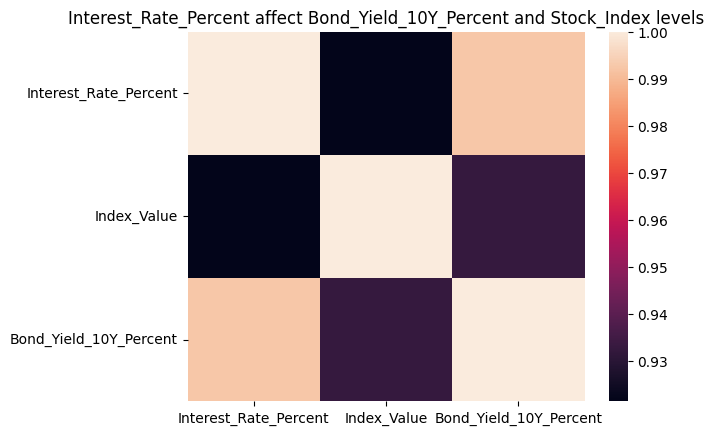

In [ ]:
corr_matrix = Finance_df[['Interest_Rate_Percent', 'Index_Value', 'Bond_Yield_10Y_Percent']].corr()
corr_matrix.to_excel('Interest_Rate_Percent affect Bond_Yield_10Y_Percent and Stock_Index levels.xlsx')
print(corr_matrix)

sns.heatmap(
    corr_matrix
)
plt.title('Interest_Rate_Percent affect Bond_Yield_10Y_Percent and Stock_Index levels')
plt.savefig('Interest_Rate_Percent affect Bond_Yield_10Y_Percent and Stock_Index levels.png', dpi=300, bbox_inches='tight')
plt.show()

Debt Sustainability:


Are countries with higher Government_Debt_GDP_Percent experiencing slower GDP_Growth_Rate_Percent?


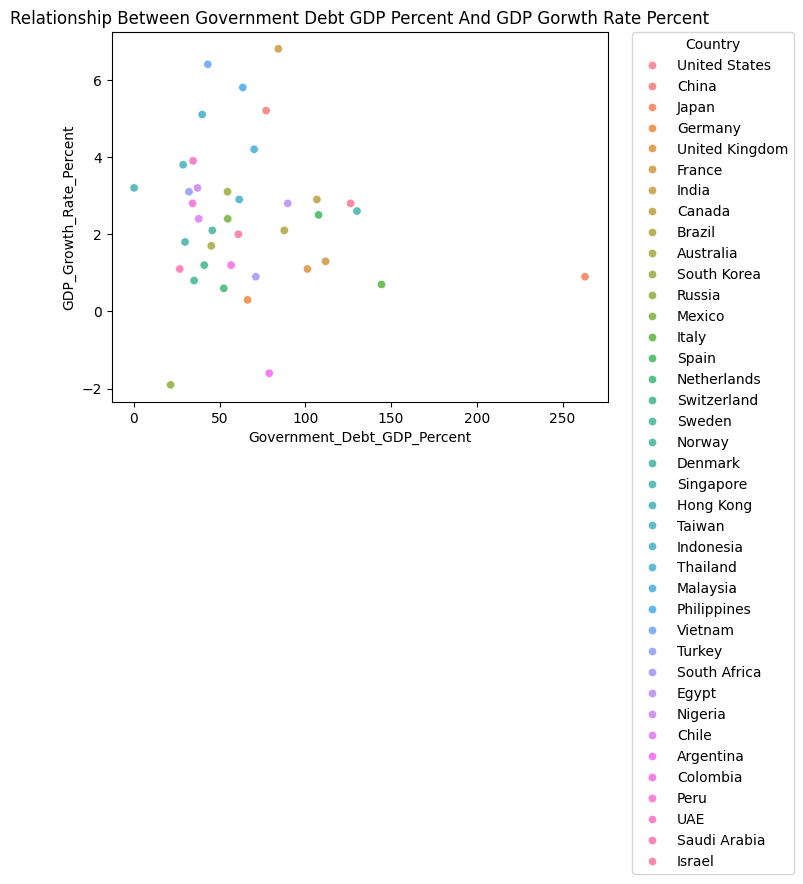

In [ ]:
sns.scatterplot(
    x='Government_Debt_GDP_Percent',
    y='GDP_Growth_Rate_Percent',
    hue='Country',
    data=Finance_df,
    alpha=0.8
)

plt.title('Relationship Between Government Debt GDP Percent And GDP Gorwth Rate Percent')
plt.Grid=True
plt.legend(
    title='Country',
    bbox_to_anchor = (1.05, 1),
    loc='upper left',
    borderaxespad = 0.
)
plt.savefig('Relationship Between Government Debt GDP Percent And GDP Gorwth Rate Percent.png', dpi=300, bbox_inches='tight')
plt.show()


Employment Correlations:


What is the relationship between Unemployment_Rate_Percent and Stock_Index performance?


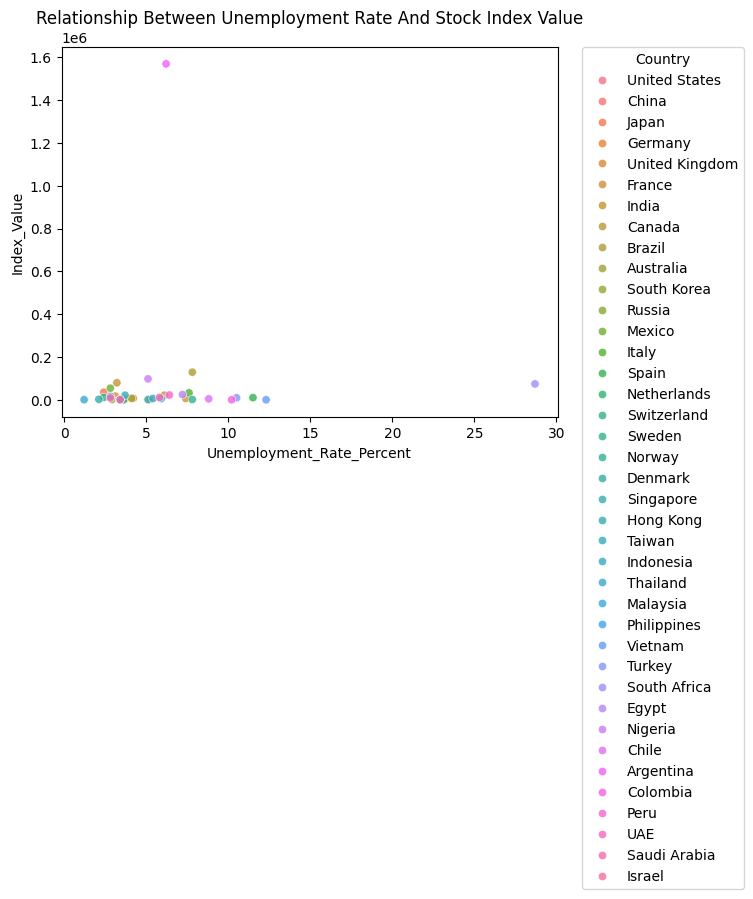

In [ ]:
sns.scatterplot(
    x='Unemployment_Rate_Percent',
    y='Index_Value',
    hue='Country',
    data=Finance_df,
    alpha=0.8
)

plt.title('Relationship Between Unemployment Rate And Stock Index Value')
plt.Grid=True
plt.legend(
    title='Country',
    bbox_to_anchor = (1.05, 1),
    loc='upper left',
    borderaxespad = 0.
)
plt.savefig('Relationship Between Unemployment Rate And Stock Index Value.png', dpi=300, bbox_inches='tight')
plt.show()


FDI Analysis:


Which countries attract the most FDI_Inflow_Billion_USD, and what macroeconomic factors correlate with it?


C:\Users\kasif\AppData\Local\Temp\ipykernel_4180\3215165761.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


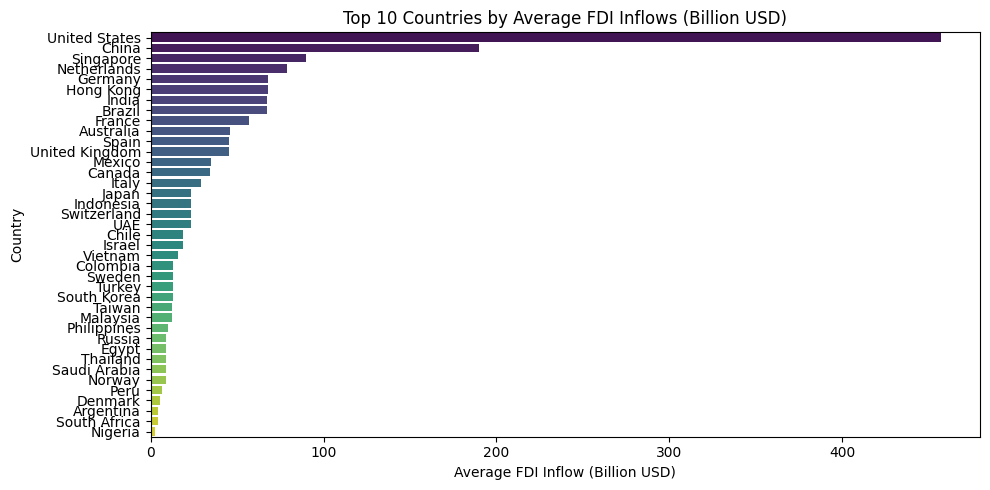

FDI_Inflow_Billion_USD                 1.000000
Market_Cap_Trillion_USD                0.950314
Real_Estate_Index                      0.367443
Commodity_Index                        0.275439
Government_Debt_GDP_Percent            0.273591
Currency_Change_YTD_Percent            0.205915
Political_Risk_Score                   0.189394
GDP_Growth_Rate_Percent                0.118915
Index_Value                           -0.089334
Exchange_Rate_USD                     -0.095313
Export_Growth_Percent                 -0.106041
Inflation_Rate_Percent                -0.119305
Interest_Rate_Percent                 -0.123704
Bond_Yield_10Y_Percent                -0.137842
Unemployment_Rate_Percent             -0.151049
Import_Growth_Percent                 -0.212829
Daily_Change_Percent                  -0.243075
Current_Account_Balance_Billion_USD   -0.563273
Oil_Price_USD_Barrel                        NaN
Gold_Price_USD_Ounce                        NaN
Name: FDI_Inflow_Billion_USD, dtype: flo

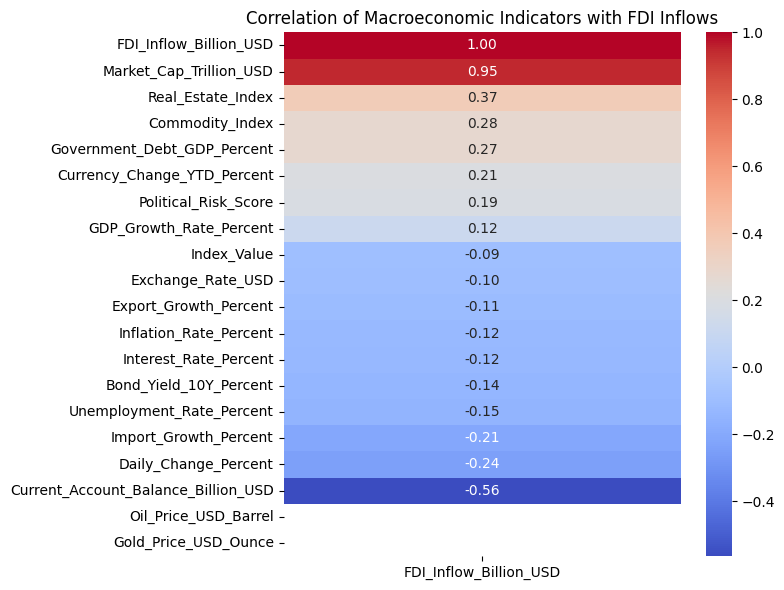

In [ ]:
top_fdi = Finance_df.groupby('Country')['FDI_Inflow_Billion_USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_fdi.values,
    y=top_fdi.index,
    palette='viridis'
)
plt.title('Top 10 Countries by Average FDI Inflows (Billion USD)')
plt.xlabel('Average FDI Inflow (Billion USD)')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('Top 10 Countries by Average FDI Inflows (Billion USD).png', dpi=300, bbox_inches='tight')
plt.show()

corr_fdi = Finance_df.corr(numeric_only=True)['FDI_Inflow_Billion_USD'].sort_values(ascending=False)
corr_fdi.to_excel('Correlation of Macroeconomic Indicators with FDI Inflows.xlsx')
print(corr_fdi)

plt.figure(figsize=(8,6))
sns.heatmap(
    Finance_df.corr(numeric_only=True)[['FDI_Inflow_Billion_USD']].sort_values(by='FDI_Inflow_Billion_USD', ascending=False),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation of Macroeconomic Indicators with FDI Inflows')
plt.tight_layout()
plt.savefig('Correlation of Macroeconomic Indicators with FDI Inflows.png', dpi=300, bbox_inches='tight')
plt.show()


Credit Rating Comparison:


Do countries with higher Credit_Rating have lower Bond_Yield_10Y_Percent or Political_Risk_Score?


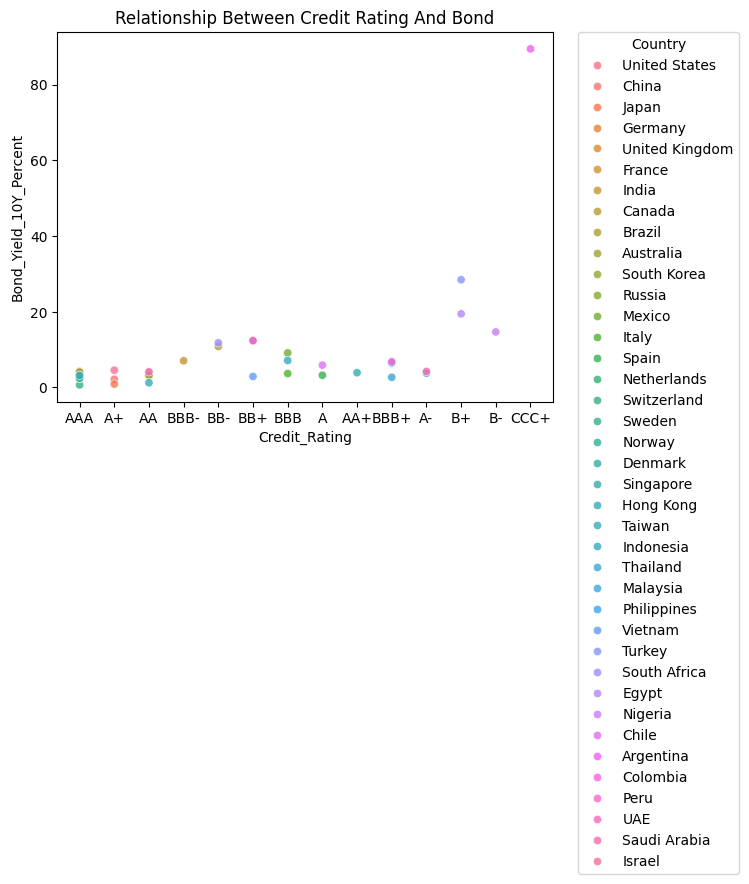

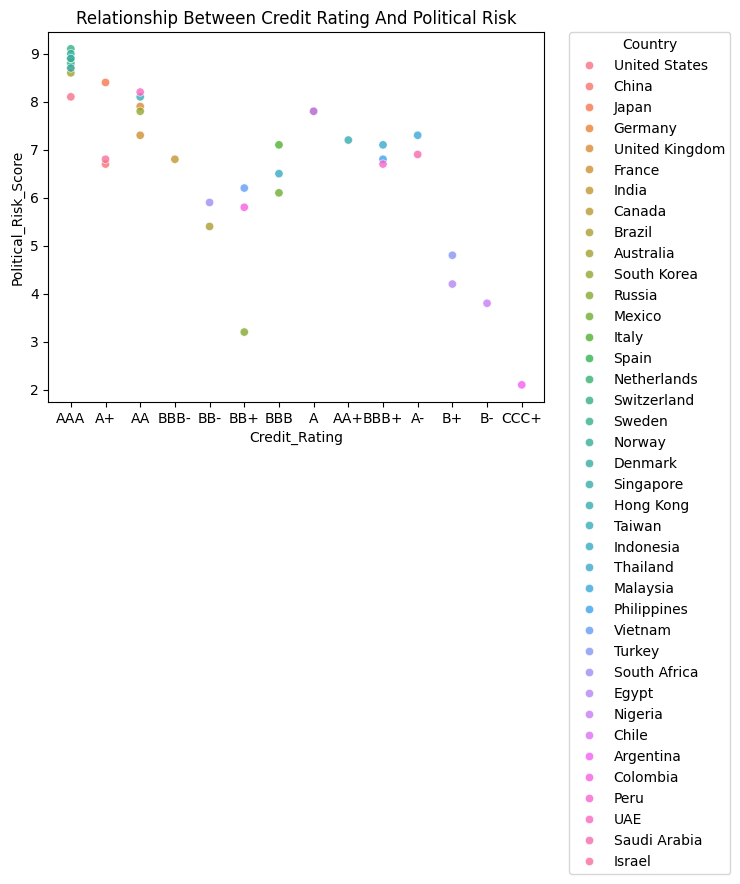

In [ ]:
sns.scatterplot(
    x='Credit_Rating',
    y='Bond_Yield_10Y_Percent',
    hue='Country',
    data=Finance_df,
    alpha=0.8
)

plt.title('Relationship Between Credit Rating And Bond')
plt.Grid=True
plt.legend(
    title='Country',
    bbox_to_anchor = (1.05, 1),
    loc='upper left',
    borderaxespad = 0.
)
plt.savefig('Relationship Between Credit Rating And Bond.png', dpi=300, bbox_inches='tight')
plt.show()

sns.scatterplot(
    x='Credit_Rating',
    y='Political_Risk_Score',
    hue='Country',
    data=Finance_df,
    alpha=0.8
)

plt.title('Relationship Between Credit Rating And Political Risk')
plt.Grid=True
plt.legend(
    title='Country',
    bbox_to_anchor = (1.05, 1),
    loc='upper left',
    borderaxespad = 0.
)
plt.savefig('Relationship Between Credit Rating And Political Risk.png', dpi=300, bbox_inches='tight')
plt.show()



Banking Sector Insight:


How does Banking_Sector_Health relate to Interest_Rate_Percent and Market_Cap_Trillion_USD?


                           Banking_Sector_Health_Num  Interest_Rate_Percent  \
Banking_Sector_Health_Num                   1.000000              -0.480852   
Interest_Rate_Percent                      -0.480852               1.000000   
Market_Cap_Trillion_USD                     0.230660              -0.094092   

                           Market_Cap_Trillion_USD  
Banking_Sector_Health_Num                 0.230660  
Interest_Rate_Percent                    -0.094092  
Market_Cap_Trillion_USD                   1.000000  


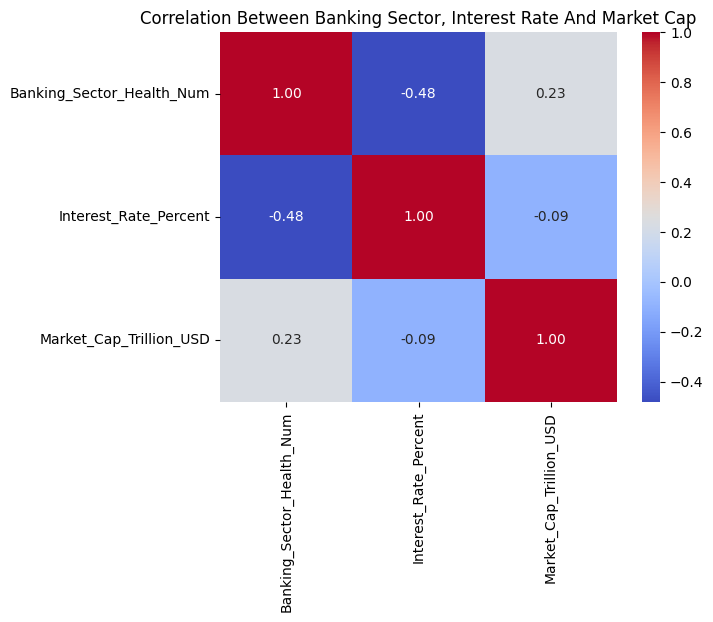

In [ ]:
Finance_df['Banking_Sector_Health'].unique()

mapping = {
    'Weak': 1,
    'Moderate': 2,
    'Strong': 3
}
Finance_df['Banking_Sector_Health_Num'] = Finance_df['Banking_Sector_Health'].map(mapping)


cols = ['Banking_Sector_Health_Num', 'Interest_Rate_Percent', 'Market_Cap_Trillion_USD']
corr = Finance_df[cols].corr(numeric_only=True)
corr.to_excel('Correlation Between Banking Sector, Interest Rate And Market Cap.xlsx')
print(corr)

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Between Banking Sector, Interest Rate And Market Cap')
plt.savefig('Correlation Between Banking Sector, Interest Rate And Market Cap.png', dpi=300, bbox_inches='tight')
plt.show()



Real Estate vs Economy:


How is the Real_Estate_Index correlated with GDP_Growth_Rate_Percent and Inflation_Rate_Percent?


                         Real_Estate_Index  Inflation_Rate_Percent  \
Real_Estate_Index                 1.000000               -0.566867   
Inflation_Rate_Percent           -0.566867                1.000000   
GDP_Growth_Rate_Percent           0.246209               -0.312325   

                         GDP_Growth_Rate_Percent  
Real_Estate_Index                       0.246209  
Inflation_Rate_Percent                 -0.312325  
GDP_Growth_Rate_Percent                 1.000000  


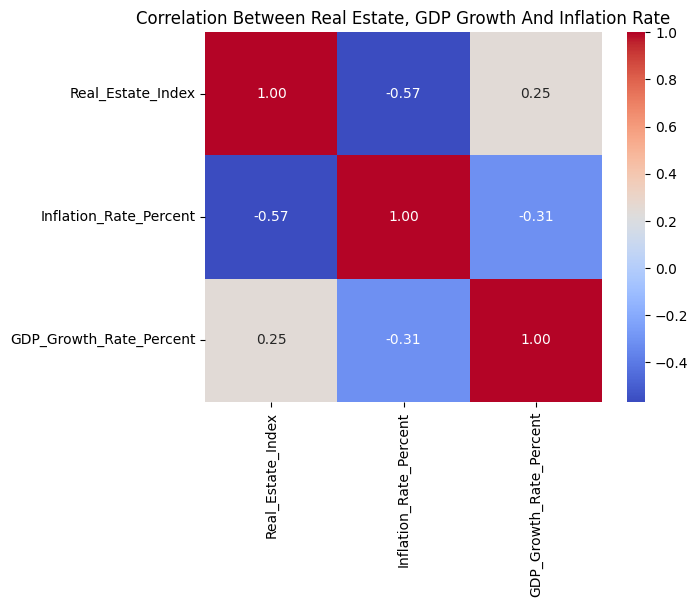

In [101]:
cols = ['Real_Estate_Index', 'Inflation_Rate_Percent', 'GDP_Growth_Rate_Percent']
corr = Finance_df[cols].corr(numeric_only=True)
corr.to_excel('Correlation Between Real Estate, GDP Growth And Inflation Rate.xlsx')
print(corr)

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Between Real Estate, GDP Growth And Inflation Rate')
plt.savefig('Correlation Between Real Estate, GDP Growth And Inflation Rate.png', dpi=300, bbox_inches='tight')
plt.show()



Commodity Influence:


How do Oil_Price_USD_Barrel and Gold_Price_USD_Ounce affect the Commodity_Index and stock performance?


                      Oil_Price_USD_Barrel  Gold_Price_USD_Ounce  \
Oil_Price_USD_Barrel                   NaN                   NaN   
Gold_Price_USD_Ounce                   NaN                   NaN   
Commodity_Index                        NaN                   NaN   
Index_Value                            NaN                   NaN   

                      Commodity_Index  Index_Value  
Oil_Price_USD_Barrel              NaN          NaN  
Gold_Price_USD_Ounce              NaN          NaN  
Commodity_Index              1.000000    -0.585652  
Index_Value                 -0.585652     1.000000  


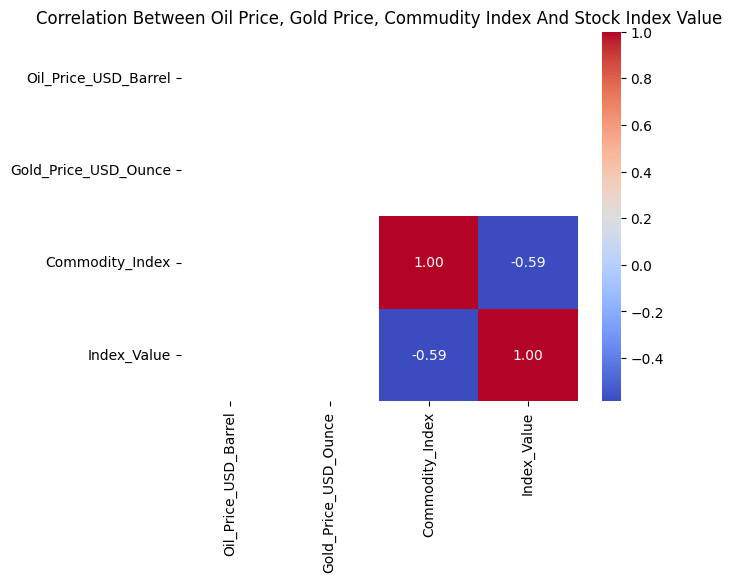

In [167]:
cols = ['Oil_Price_USD_Barrel', 'Gold_Price_USD_Ounce', 'Commodity_Index', 'Index_Value']
corr = Finance_df[cols].corr(numeric_only=True)
corr.to_excel('Correlation Between Oil Price, Gold Price, Commudity Index And Stock Index Value.xlsx')
print(corr)

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Between Oil Price, Gold Price, Commudity Index And Stock Index Value')
plt.savefig('Correlation Between Oil Price, Gold Price, Commudity Index And Stock Index Value.png', dpi=300, bbox_inches='tight')
plt.show()



Commodity & Inflation:


Is there a relationship between global Oil_Price_USD_Barrel fluctuations and Inflation_Rate_Percent?


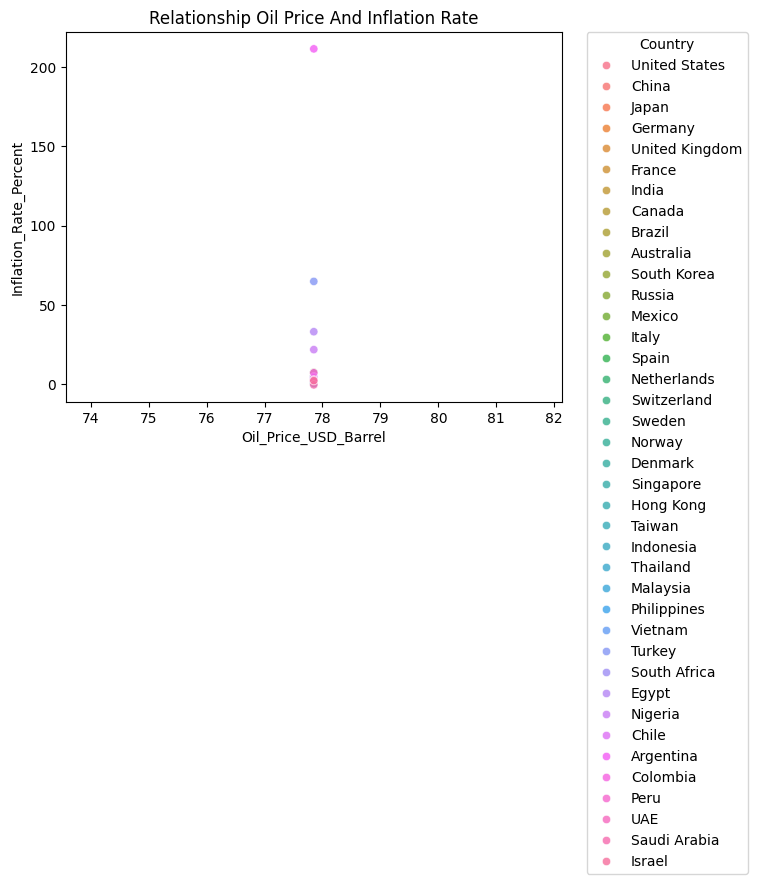

In [108]:
sns.scatterplot(
    x='Oil_Price_USD_Barrel',
    y='Inflation_Rate_Percent',
    hue='Country',
    data=Finance_df,
    alpha=0.8
)

plt.title('Relationship Oil Price And Inflation Rate')
plt.Grid=True
plt.legend(
    title='Country',
    bbox_to_anchor = (1.05, 1),
    loc='upper left',
    borderaxespad = 0.
)
plt.savefig('Relationship Oil Price And Inflation Rate.png', dpi=300, bbox_inches='tight')
plt.show()


Trade Balance Trends:


How does the Current_Account_Balance_Billion_USD relate to Export_Growth_Percent and Import_Growth_Percent?


                                     Current_Account_Balance_Billion_USD  \
Current_Account_Balance_Billion_USD                             1.000000   
Export_Growth_Percent                                           0.156752   
Import_Growth_Percent                                           0.070223   

                                     Export_Growth_Percent  \
Current_Account_Balance_Billion_USD               0.156752   
Export_Growth_Percent                             1.000000   
Import_Growth_Percent                             0.658904   

                                     Import_Growth_Percent  
Current_Account_Balance_Billion_USD               0.070223  
Export_Growth_Percent                             0.658904  
Import_Growth_Percent                             1.000000  


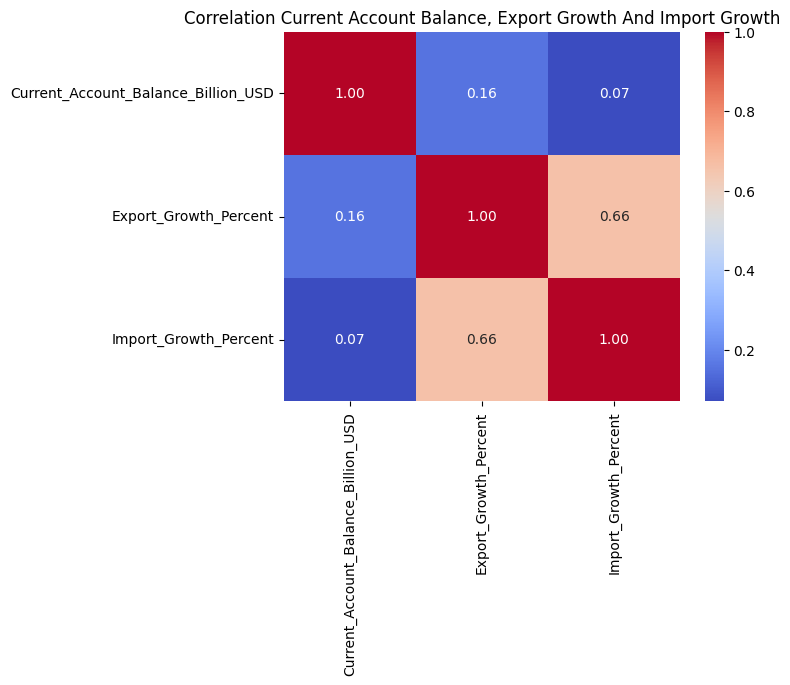

In [110]:
cols = ['Current_Account_Balance_Billion_USD', 'Export_Growth_Percent', 'Import_Growth_Percent']
corr = Finance_df[cols].corr(numeric_only=True)
corr.to_excel('Correlation Current Account Balance, Export Growth And Import Growth.xlsx')
print(corr)

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Current Account Balance, Export Growth And Import Growth')
plt.savefig('Correlation Current Account Balance, Export Growth And Import Growth.png', dpi=300, bbox_inches='tight')
plt.show()



Export-Import Relationship:


Which countries show a positive correlation between export and import growth?


🌍 Overall correlation between Export and Import Growth across countries: 0.66
🌍 Countries with Positive Export and Import Growth:
           Country  Export_Growth_Percent  Import_Growth_Percent
36             UAE                   23.4                   18.9
31         Nigeria                   23.4                   34.5
22          Taiwan                   15.2                   13.8
11          Russia                   15.2                   18.7
6            India                   13.2                   10.9
27         Vietnam                   12.8                   14.2
20       Singapore                   12.4                   11.7
30           Egypt                   12.3                   23.4
37    Saudi Arabia                   12.3                    8.9
35            Peru                    9.8                    8.2
10     South Korea                    9.1                    7.8
1            China                    8.9                    6.1
18          Norway       

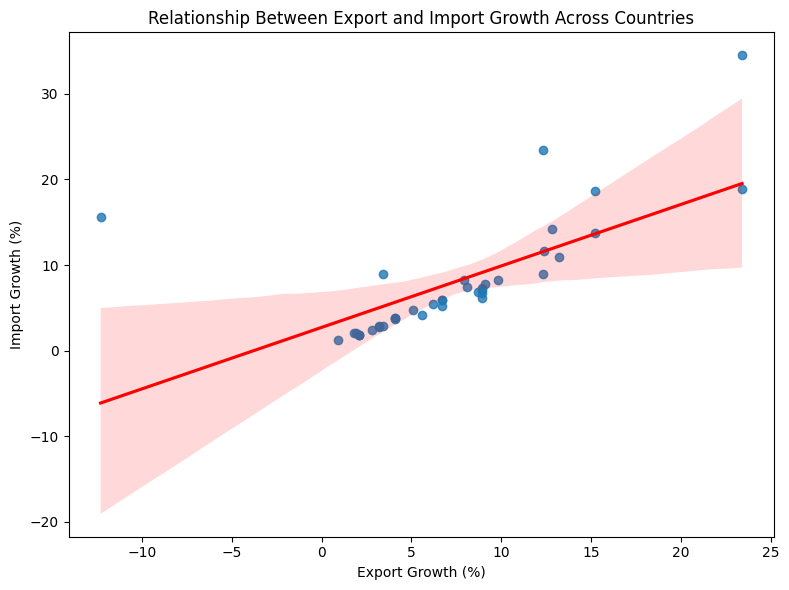

In [137]:
Finance_df['Export_Growth_Percent'] = pd.to_numeric(Finance_df['Export_Growth_Percent'], errors='coerce')
Finance_df['Import_Growth_Percent'] = pd.to_numeric(Finance_df['Import_Growth_Percent'], errors='coerce')

overall_corr = Finance_df['Export_Growth_Percent'].corr(Finance_df['Import_Growth_Percent'])
print(f"🌍 Overall correlation between Export and Import Growth across countries: {overall_corr:.2f}")

positive_trade = Finance_df[
    (Finance_df['Export_Growth_Percent'] > 0) &
    (Finance_df['Import_Growth_Percent'] > 0)
][['Country', 'Export_Growth_Percent', 'Import_Growth_Percent']]
positive_trade.to_excel('Export_Import_Correlation_by_Country.xlsx')
print("🌍 Countries with Positive Export and Import Growth:")
print(positive_trade.sort_values('Export_Growth_Percent', ascending=False))


plt.figure(figsize=(8,6))
sns.regplot(
    data=Finance_df,
    x='Export_Growth_Percent',
    y='Import_Growth_Percent',
    scatter_kws={'alpha':0.8},
    line_kws={'color':'red'}
)
plt.title('Relationship Between Export and Import Growth Across Countries')
plt.xlabel('Export Growth (%)')
plt.ylabel('Import Growth (%)')
plt.tight_layout()
plt.savefig('Export_Import_Correlation_by_Country.png', dpi=300, bbox_inches='tight')
plt.show()



Are trade-surplus countries more likely to have appreciating currencies?


🌍 Correlation between Trade Balance and Currency Appreciation: 0.08
📊 Trade vs Currency Movement Summary:
Currency_Movement  Appreciating  Depreciating
Trade_Status                                 
Deficit                       2            11
Surplus                      12            14


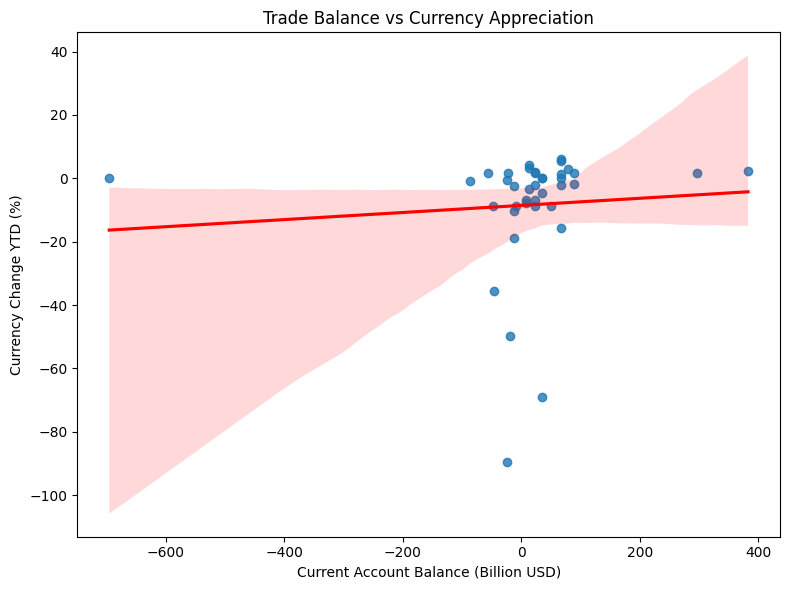

In [144]:
corr = Finance_df['Current_Account_Balance_Billion_USD'].corr(Finance_df['Currency_Change_YTD_Percent'])
print(f"🌍 Correlation between Trade Balance and Currency Appreciation: {corr:.2f}")

def trade_status(balance):
    if balance > 0:
        return 'Surplus'
    elif balance < 0:
        return 'Deficit'
    else:
        return 'Balanced'

Finance_df['Trade_Status'] = Finance_df['Current_Account_Balance_Billion_USD'].apply(trade_status)

# Classify currency movement
Finance_df['Currency_Movement'] = Finance_df['Currency_Change_YTD_Percent'].apply(lambda x: 'Appreciating' if x > 0 else 'Depreciating')

summary = Finance_df.groupby(['Trade_Status', 'Currency_Movement']).size().unstack(fill_value=0)
summary.to_excel('📊 Trade vs Currency Movement Summary.xlsx')
print("📊 Trade vs Currency Movement Summary:")
print(summary)


plt.figure(figsize=(8,6))
sns.regplot(
    data=Finance_df,
    x='Current_Account_Balance_Billion_USD',
    y='Currency_Change_YTD_Percent',
    scatter_kws={'alpha':0.8},
    line_kws={'color':'red'}
)
plt.title('Trade Balance vs Currency Appreciation')
plt.xlabel('Current Account Balance (Billion USD)')
plt.ylabel('Currency Change YTD (%)')
plt.tight_layout()
plt.savefig('📊 Trade vs Currency Movement Summary', dpi=300, bbox_inches='tight')
plt.show()


Political vs Economic Risk:


How does Political_Risk_Score correlate with Credit_Rating, GDP_Growth_Rate_Percent, and Stock_Index performance?


📊 Correlation Matrix:
                         Political_Risk_Score  Credit_Rating_Score  \
Political_Risk_Score                 1.000000            -0.912754   
Credit_Rating_Score                 -0.912754             1.000000   
GDP_Growth_Rate_Percent              0.123726             0.030416   
Index_Value                         -0.519061             0.417447   

                         GDP_Growth_Rate_Percent  Index_Value  
Political_Risk_Score                    0.123726    -0.519061  
Credit_Rating_Score                     0.030416     0.417447  
GDP_Growth_Rate_Percent                 1.000000    -0.342591  
Index_Value                            -0.342591     1.000000  


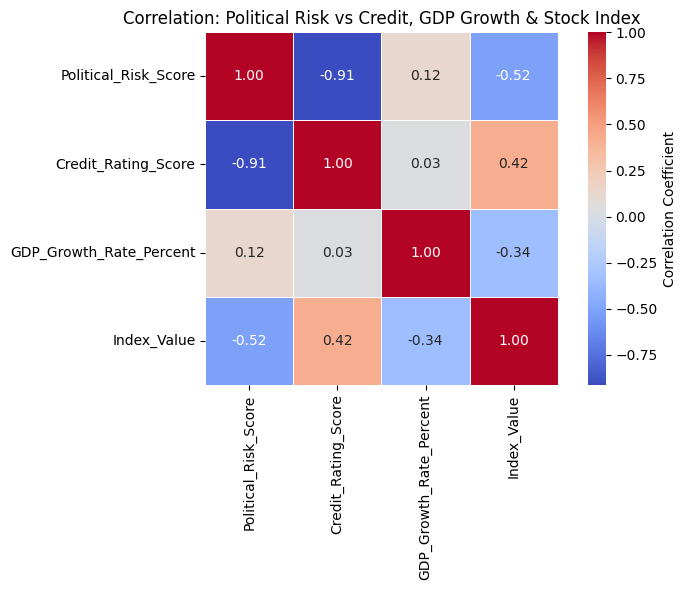

In [148]:
# Create a mapping (S&P style)
rating_map = {
    'AAA': 1, 'AA+': 2, 'AA': 3, 'AA-': 4,
    'A+': 5, 'A': 6, 'A-': 7,
    'BBB+': 8, 'BBB': 9, 'BBB-': 10,
    'BB+': 11, 'BB': 12, 'BB-': 13,
    'B+': 14, 'B': 15, 'B-': 16,
    'CCC+': 17, 'CCC': 18, 'CCC-': 19,
    'CC': 20, 'C': 21, 'D': 22
}

# Apply mapping
Finance_df['Credit_Rating_Score'] = Finance_df['Credit_Rating'].map(rating_map)


cols_to_use = [
    'Political_Risk_Score',
    'Credit_Rating_Score',
    'GDP_Growth_Rate_Percent',
    'Index_Value'
]

Finance_df[cols_to_use] = Finance_df[cols_to_use].apply(pd.to_numeric, errors='coerce')
clean_df = Finance_df.dropna(subset=cols_to_use)

corr = Finance_df[cols_to_use].corr()
corr.to_excel('Correlation: Political Risk vs Credit, GDP Growth & Stock Index.xlsx')
print("📊 Correlation Matrix:")
print(corr)

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    square=True,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation: Political Risk vs Credit, GDP Growth & Stock Index')
plt.tight_layout()
plt.savefig('Correlation: Political Risk vs Credit, GDP Growth & Stock Index.png', dpi=300, bbox_inches='tight')
plt.show()



Market Resilience:


During economic downturns (negative GDP_Growth_Rate_Percent), how stable are stock indices and bond yields?


📈 Market Stability Summary by Economic Phase:
                Index_Value_mean  Index_Value_std  \
Economic_Phase                                      
Downturn           785339.650000     1.106694e+06   
Growth              20755.321622     2.991667e+04   

                Bond_Yield_10Y_Percent_mean  Bond_Yield_10Y_Percent_std  
Economic_Phase                                                           
Downturn                          50.950000                   54.447222  
Growth                             5.836216                    5.562563  


C:\Users\kasif\AppData\Local\Temp\ipykernel_4180\2683931461.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




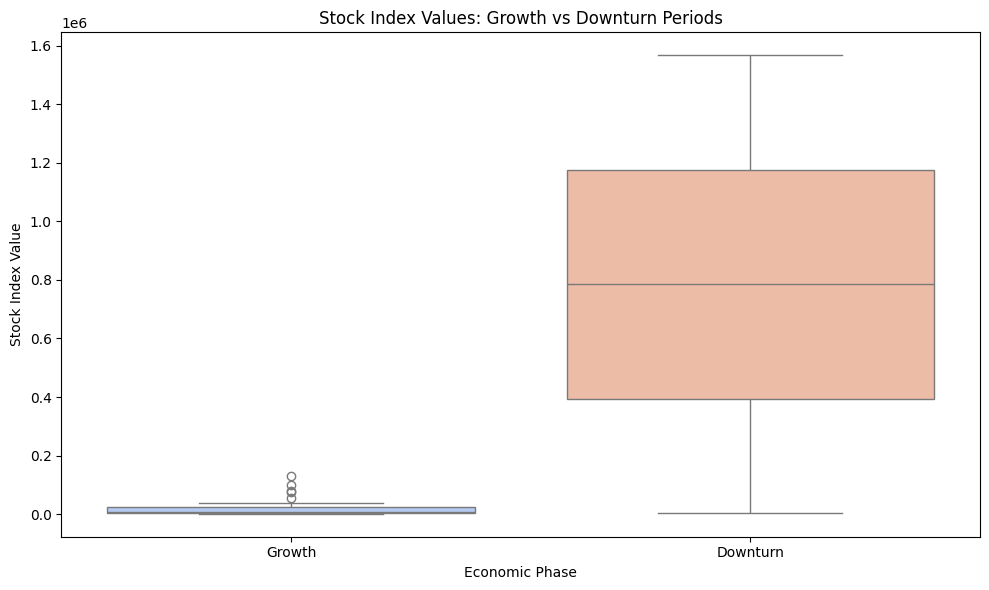

C:\Users\kasif\AppData\Local\Temp\ipykernel_4180\2683931461.py:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




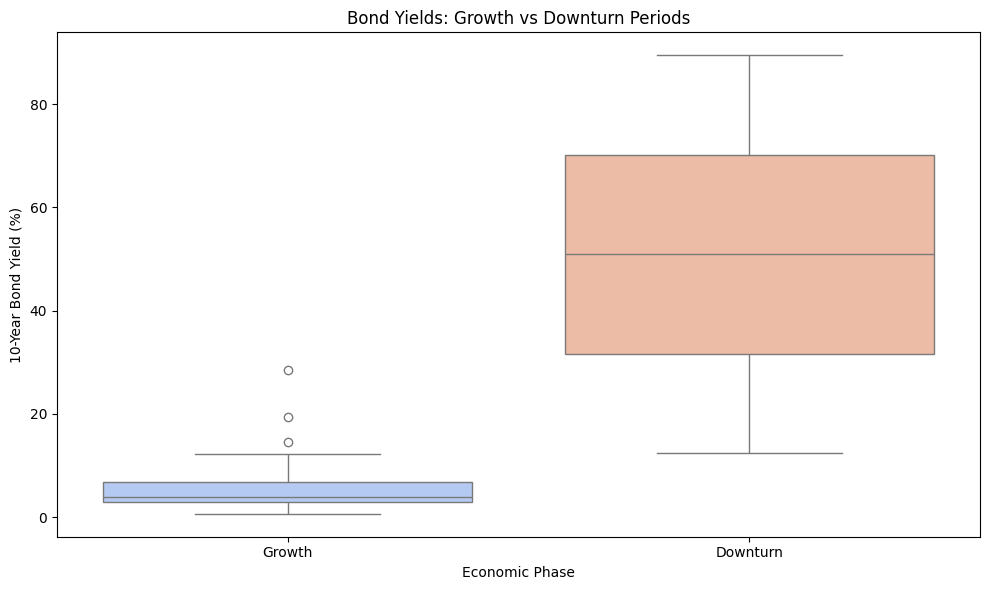

In [153]:
# Ensure numeric
Finance_df['GDP_Growth_Rate_Percent'] = pd.to_numeric(Finance_df['GDP_Growth_Rate_Percent'], errors='coerce')
Finance_df['Index_Value'] = pd.to_numeric(Finance_df['Index_Value'], errors='coerce')
Finance_df['Bond_Yield_10Y_Percent'] = pd.to_numeric(Finance_df['Bond_Yield_10Y_Percent'], errors='coerce')

# Drop missing
clean_df = Finance_df.dropna(subset=['GDP_Growth_Rate_Percent', 'Index_Value', 'Bond_Yield_10Y_Percent'])

clean_df['Economic_Phase'] = clean_df['GDP_Growth_Rate_Percent'].apply(
    lambda x: 'Downturn' if x < 0 else 'Growth'
)

summary = clean_df.groupby('Economic_Phase')[['Index_Value', 'Bond_Yield_10Y_Percent']].agg(['mean', 'std'])
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
summary.to_excel('📈 Market Stability Summary by Economic Phase.xlsx')
print("📈 Market Stability Summary by Economic Phase:")
print(summary)


plt.figure(figsize=(10,6))
sns.boxplot(
    data=clean_df,
    x='Economic_Phase',
    y='Index_Value',
    palette='coolwarm'
)
plt.title('Stock Index Values: Growth vs Downturn Periods')
plt.xlabel('Economic Phase')
plt.ylabel('Stock Index Value')
plt.tight_layout()
plt.savefig('Stock Index Values: Growth vs Downturn Periods.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(
    data=clean_df,
    x='Economic_Phase',
    y='Bond_Yield_10Y_Percent',
    palette='coolwarm'
)
plt.title('Bond Yields: Growth vs Downturn Periods')
plt.xlabel('Economic Phase')
plt.ylabel('10-Year Bond Yield (%)')
plt.tight_layout()
plt.savefig('Bond Yields: Growth vs Downturn Periods.png', dpi=300, bbox_inches='tight')
plt.show()


Inflation and Debt Dynamics:


Do highly indebted countries also experience higher inflation or interest rates?


📊 Correlation Matrix:
                             Government_Debt_GDP_Percent  \
Government_Debt_GDP_Percent                     1.000000   
Inflation_Rate_Percent                          0.000003   
Interest_Rate_Percent                          -0.042033   

                             Inflation_Rate_Percent  Interest_Rate_Percent  
Government_Debt_GDP_Percent                0.000003              -0.042033  
Inflation_Rate_Percent                     1.000000               0.993227  
Interest_Rate_Percent                      0.993227               1.000000  


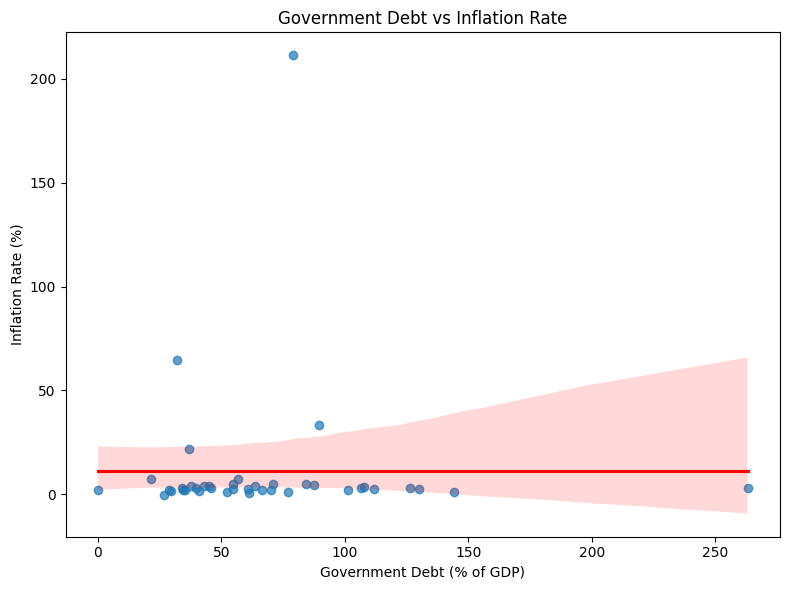

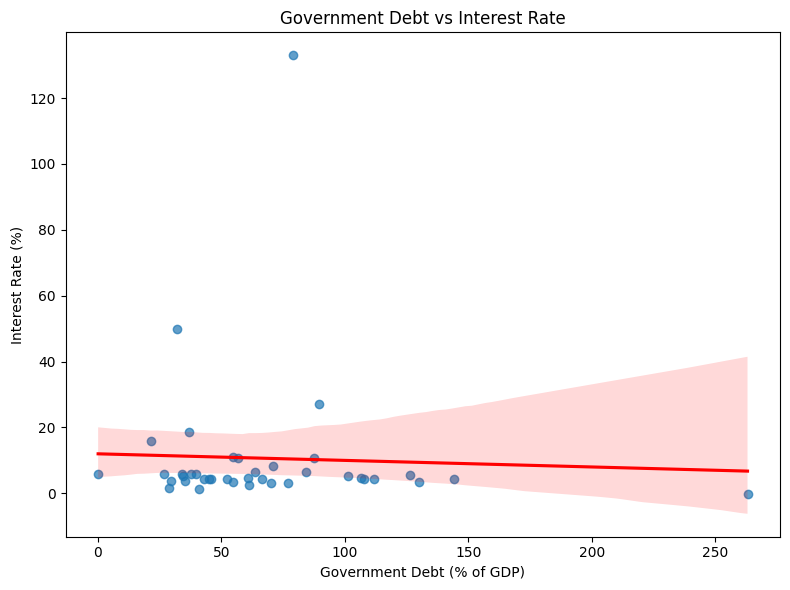

In [156]:
# Ensure numeric data
Finance_df['Government_Debt_GDP_Percent'] = pd.to_numeric(Finance_df['Government_Debt_GDP_Percent'], errors='coerce')
Finance_df['Inflation_Rate_Percent'] = pd.to_numeric(Finance_df['Inflation_Rate_Percent'], errors='coerce')
Finance_df['Interest_Rate_Percent'] = pd.to_numeric(Finance_df['Interest_Rate_Percent'], errors='coerce')

# Drop missing values
df_debt = Finance_df.dropna(subset=['Government_Debt_GDP_Percent', 'Inflation_Rate_Percent', 'Interest_Rate_Percent'])

corr = df_debt[['Government_Debt_GDP_Percent', 'Inflation_Rate_Percent', 'Interest_Rate_Percent']].corr()
corr.to_excel('Correlation Matrix: Government Debt vs Inflation & Interest Rates.xlsx')
print("📊 Correlation Matrix:")
print(corr)

plt.figure(figsize=(8,6))
sns.regplot(
    data=df_debt,
    x='Government_Debt_GDP_Percent',
    y='Inflation_Rate_Percent',
    scatter_kws={'alpha':0.7},
    line_kws={'color':'red'}
)
plt.title('Government Debt vs Inflation Rate')
plt.xlabel('Government Debt (% of GDP)')
plt.ylabel('Inflation Rate (%)')
plt.tight_layout()
plt.savefig('Government Debt vs Inflation Rate.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8,6))
sns.regplot(
    data=df_debt,
    x='Government_Debt_GDP_Percent',
    y='Interest_Rate_Percent',
    scatter_kws={'alpha':0.7},
    line_kws={'color':'red'}
)
plt.title('Government Debt vs Interest Rate')
plt.xlabel('Government Debt (% of GDP)')
plt.ylabel('Interest Rate (%)')
plt.tight_layout()
plt.savefig('Government Debt vs Interest Rate,png', dpi=300, bbox_inches='tight')
plt.show()
